In [1]:
# dependencies for google colab
! pip install langchain_google_genai
! pip install python-dotenv


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.4 MB/s eta 0:00:00


In [2]:
import requests
from PIL import Image
import torch
#importing models
from transformers import BlipProcessor, BlipForConditionalGeneration
from langchain_google_genai import ChatGoogleGenerativeAI

from dotenv import load_dotenv
import os
import re

from langchain import PromptTemplate
from langchain.chains import LLMChain
from langchain.output_parsers import StructuredOutputParser, ResponseSchema
from langchain.prompts import ChatPromptTemplate

from diffusers import DiffusionPipeline


In [12]:
load_dotenv()


True

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [13]:
Hugging_face_token=os.getenv('hugging_face_token')

In [14]:
! huggingface-cli login --token $Hugging_face_token


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: fineGrained).
The token `TristanPadiou` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `TristanPadiou`


In [3]:

# from transformers import Blip2Processor, Blip2ForConditionalGeneration
# import torch

# device = "cuda" if torch.cuda.is_available() else "cpu"

# processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
# model = Blip2ForConditionalGeneration.from_pretrained(
#     "Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16
# )
# model.to(device)
# url = "http://images.cocodataset.org/val2017/000000039769.jpg"
# image = Image.open(requests.get(url, stream=True).raw)

# inputs = processor(images=image, return_tensors="pt").to(device, torch.float16)

# generated_ids = model.generate(**inputs)
# generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
# print(generated_text)

In [18]:
# loading image captionning model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large").to(device, torch.float16)


# loading stable diffusion
pipe = DiffusionPipeline.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5")
pipe = pipe.to(device, torch.float16)




Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [7]:
img_url = 'https://media.istockphoto.com/id/689616366/vector/kids-doodles-hand-drawing-unicorn-running-on-rainbow.jpg?s=1024x1024&w=is&k=20&c=lRb6FO8AyraMpQ8dfyuYcT51wCQJMKkUWbK8KWTw-is='
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

In [19]:
# # conditional image captioning
# text = "a photography of"
# inputs = processor(raw_image, text, return_tensors="pt").to("cuda")

# out = model.generate(**inputs).
# print(processor.decode(out[0], skip_special_tokens=True))

# unconditional image captioning
inputs = processor(raw_image, return_tensors="pt").to(device, torch.float16)

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


a drawing of a unicorn on a rainbow with a sun in the background


In [20]:
model_prompt=processor.decode(out[0], skip_special_tokens=True)

In [21]:
model_prompt

'a drawing of a unicorn on a rainbow with a sun in the background'

In [22]:


# Set the model name for our LLMs.
GEMINI_MODEL = "gemini-1.5-flash"

# Store the API key in a variable.
GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")

In [23]:
llm = ChatGoogleGenerativeAI(google_api_key=GEMINI_API_KEY, model=GEMINI_MODEL, temperature=0.3)

In [24]:
requirement = input("Please input your requirement for the story: ")

Please input your requirement for the story: short, for an 8 years old, scary


In [25]:
query =f' Write a short story based on the content of {model_prompt} and that fits the following requirements: {requirement}'

In [26]:
result = llm.invoke(query)
print(result.content)

Sunny the unicorn pranced across the rainbow bridge, her silver horn gleaming.  The sun, usually warm and friendly, looked… different today. It was HUGE, and its light wasn't sunny yellow, but a creepy, blood-red.

Sunny felt a shiver, colder than a winter's night. The rainbow, usually bright and cheerful, was fading, its colours turning dull and muddy.  A low growl rumbled from the red sun, a sound like rocks grinding together.

Suddenly, the rainbow cracked!  A jagged hole appeared, and from it, a shadowy claw reached out, long and sharp as a dragon's tooth.  It snatched at Sunny!

Sunny, brave but scared, kicked her tiny hooves and bolted.  The shadow-claw swiped again, missing her by a whisker.  She galloped faster, the red sun seeming to chase her, its growl getting louder.

Would Sunny escape the scary, red sun and the shadow-claw?  She had to reach the end of the rainbow before it disappeared completely!  Her heart pounded like a drum.  This was the scariest rainbow ride ever!



In [28]:
story= result.content.replace('\n',' ')
story

"Sunny the unicorn pranced across the rainbow bridge, her silver horn gleaming.  The sun, usually warm and friendly, looked… different today. It was HUGE, and its light wasn't sunny yellow, but a creepy, blood-red.  Sunny felt a shiver, colder than a winter's night. The rainbow, usually bright and cheerful, was fading, its colours turning dull and muddy.  A low growl rumbled from the red sun, a sound like rocks grinding together.  Suddenly, the rainbow cracked!  A jagged hole appeared, and from it, a shadowy claw reached out, long and sharp as a dragon's tooth.  It snatched at Sunny!  Sunny, brave but scared, kicked her tiny hooves and bolted.  The shadow-claw swiped again, missing her by a whisker.  She galloped faster, the red sun seeming to chase her, its growl getting louder.  Would Sunny escape the scary, red sun and the shadow-claw?  She had to reach the end of the rainbow before it disappeared completely!  Her heart pounded like a drum.  This was the scariest rainbow ride ever! 

In [48]:
character_extraction_llm=ChatGoogleGenerativeAI(google_api_key=GEMINI_API_KEY, model=GEMINI_MODEL, temperature=0.3)
schemas=[
    ResponseSchema(name='character 1', description='character description'),
    ResponseSchema(name='character 2', description='character description'),
    ResponseSchema(name='character 3', description='character description')

]
parser=StructuredOutputParser.from_response_schemas(schemas)
instructions=parser.get_format_instructions()

In [64]:
query = f' list the appearance of 3 characters of this {story}'+ '\n\n'+instructions

In [65]:
result_characters=character_extraction_llm.invoke(query)

In [66]:
result_characters.content

'```json\n{\n  "character 1": "Sunny: A brave but scared unicorn with a silver horn, small in size.",\n  "character 2": "The Red Sun: A huge, blood-red sun with a creepy appearance, emitting a low growl like rocks grinding together, acting as a menacing pursuer.",\n  "character 3": "Shadow-Claw: A large, shadowy claw that emerges from a crack in the rainbow, long and sharp like a dragon\'s tooth, actively trying to capture Sunny."\n}\n```\n'

In [67]:
characters=parser.parse(result_characters.content)
characters

{'character 1': 'Sunny: A brave but scared unicorn with a silver horn, small in size.',
 'character 2': 'The Red Sun: A huge, blood-red sun with a creepy appearance, emitting a low growl like rocks grinding together, acting as a menacing pursuer.',
 'character 3': "Shadow-Claw: A large, shadowy claw that emerges from a crack in the rainbow, long and sharp like a dragon's tooth, actively trying to capture Sunny."}

In [29]:
image_prompt_llm=ChatGoogleGenerativeAI(google_api_key=GEMINI_API_KEY, model=GEMINI_MODEL, temperature=0.3)

schemas=[
    ResponseSchema(name='prompt 1', description='the prompt'),
    ResponseSchema(name='prompt 2', description='the prompt'),
    ResponseSchema(name='prompt 3', description='the prompt'),
    ResponseSchema(name='prompt 4', description='the prompt')
]

parser=StructuredOutputParser.from_response_schemas(schemas)
instructions=parser.get_format_instructions()

In [62]:
query = f' based on this story: {story}. Create 4 prompts for stable diffusion that tells\
 the story in a linear fashion with a consistant drawing style.\
  The prompts have to be a maximum of 77 words long'+ '\n\n'+instructions




In [63]:
result=image_prompt_llm.invoke(query)
result

AIMessage(content='```json\n{\n  "prompt 1": "A majestic unicorn, silver horn gleaming, prances across a vibrant rainbow bridge under a normally warm sun, now gigantic and blood-red, emitting a menacing glow; hyperrealistic, detailed, 8k resolution, artstation trending, cinematic lighting",\n  "prompt 2": "The rainbow bridge, now dull and muddy, cracks open revealing a shadowy claw reaching out from a dark void; the unicorn, Sunny, flees in terror, hooves kicking up sparkles, the red sun looming menacingly in the background; hyperrealistic, detailed, 8k resolution, artstation trending, cinematic lighting",\n  "prompt 3": "Sunny the unicorn gallops desperately across the crumbling rainbow, the blood-red sun\'s shadow-claw swiping dangerously close;  a sense of urgency and fear is palpable; hyperrealistic, detailed, 8k resolution, artstation trending, cinematic lighting",\n  "prompt 4": "Sunny, exhausted but determined, reaches the end of the fading rainbow, escaping the monstrous red su

In [60]:
image_prompts = parser.parse(result.content)

OutputParserException: Got invalid return object. Expected key `character 1` to be present, but got [{'prompt': 'A brave unicorn, Sunny, with a silver horn, prances across a vibrant rainbow bridge under a normal sun.  Painterly style, whimsical, magical realism.', 'style': 'Painterly, whimsical, magical realism'}, {'prompt': 'The sun is now HUGE and blood-red, its light creepy. The rainbow is fading, colors dull and muddy. Sunny, scared, looks back at the monstrous red sun.  Painterly style, whimsical, magical realism.', 'style': 'Painterly, whimsical, magical realism'}, {'prompt': "A jagged hole appears in the rainbow; a long, sharp shadow-claw, like a dragon's tooth, reaches out, grabbing at Sunny who gallops away, terrified.  Painterly style, whimsical, magical realism.", 'style': 'Painterly, whimsical, magical realism'}, {'prompt': 'Sunny, the silver-horned unicorn, races across the rapidly disappearing rainbow, pursued by the monstrous red sun and its shadow-claw.  She must reach the end! Painterly style, whimsical, magical realism.', 'style': 'Painterly, whimsical, magical realism'}]
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE

In [61]:
image_prompts

{'prompt 1': "A unicorn, Sunny, with a silver horn, prances across a vibrant rainbow bridge under a normally warm sun.  The style is whimsical, slightly dark fantasy, reminiscent of classic children's book illustrations. Focus on Sunny's joyful expression and the bright, cheerful rainbow.",
 'prompt 2': 'The sun is now enormous and blood-red, casting a menacing glow. The rainbow is fading, its colors dull and muddy. Sunny looks frightened, her expression reflecting fear and urgency. The style remains consistent with the first image, emphasizing the shift in mood.',
 'prompt 3': "A shadowy claw, sharp as a dragon's tooth, emerges from a crack in the rainbow, reaching for Sunny. Sunny is running, her hooves kicking up dust, her expression one of determined fear. Maintain the whimsical dark fantasy style, highlighting the action and danger.",
 'prompt 4': "Sunny gallops desperately across the rapidly disappearing rainbow, the red sun looming behind her, its growl echoing. The shadow claw 

In [43]:
# prompt = result["text"]
images=[]
for i in image_prompts.keys():

  image = pipe(image_prompts[i]).images[0]
  images.append(image)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

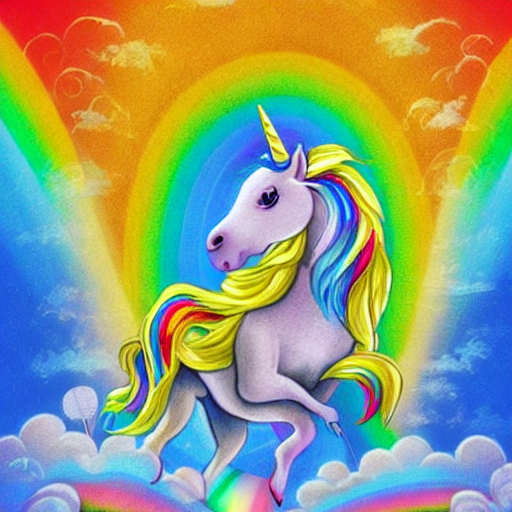

In [44]:
images[0]

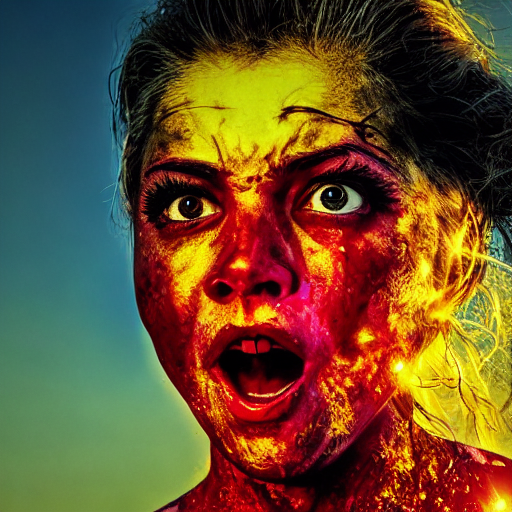

In [45]:
images[1]

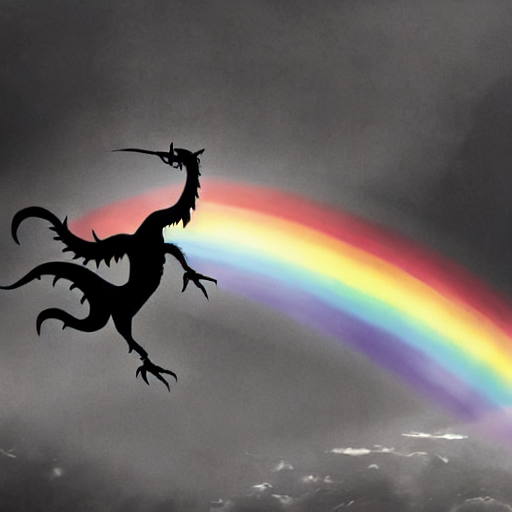

In [46]:
images[2]

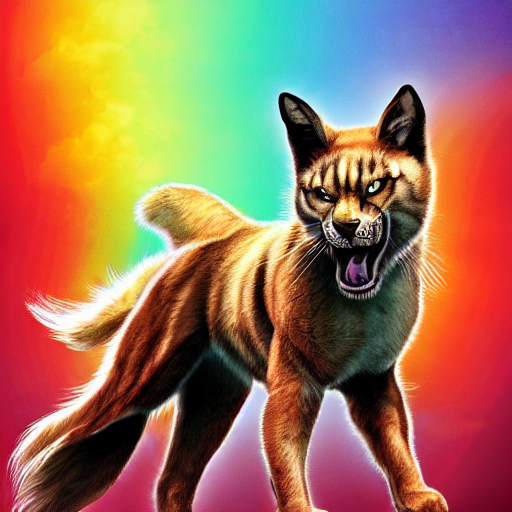

In [47]:
images[3]

In [ ]:
# ouputs:
generated_story=result["text"]
generated_image=image
generated_image